# Examining SAT Scores & Venues in NYC

#### SAT scores are a good indicator of whether a school's students are performing well or not. The higher the score, the more likely that a school is rated higher and are therefore more appealing for parents who have children they need to put through school. By moving to a neighborhood with a high school that produces high average SAT scores, parents are likely to ensure that their children are attending and receiving a good education. 

#### After examining which neighborhoods seem to have better SAT scores in NYC, we can then explore to see what venues are popular in neighborhoods with high achieving students and see if there are any patterns to certain venues over others. This can be done using the Foursquare API. 

#### First let's obtain the data for NYC high schools and their respective SAT scores into a pandas dataframe, called df_nyc_sat

In [1]:
import pandas as pd
file_loc = 'C:/Users/keshav/Documents/Coursera - IBM Data Science/Course 9 - Applied Data Science Capstone/NYC_SAT_SCORES.csv'
df_nyc_sat = pd.read_csv(file_loc)
df_nyc_sat

,School ID,School Name,Borough,Building Code,Street Address,City,State,Zip Code,Latitude,Longitude,...,End Time,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested
0,02M260,Clinton School Writers and Artists,Manhattan,M933,425 West 33rd Street,Manhattan,NY,10001,40.75321,-73.99786,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06M211,Inwood Early College for Health and Informatio...,Manhattan,M052,650 Academy Street,Manhattan,NY,10002,40.86605,-73.92486,...,3:00 PM,87.0,3.4%,21.8%,67.8%,4.6%,NaN,NaN,NaN,NaN
2,01M539,"New Explorations into Science, Technology and ...",Manhattan,M022,111 Columbia Street,Manhattan,NY,10002,40.71873,-73.97943,...,4:00 PM,1735.0,28.6%,13.3%,18.0%,38.5%,657.0,601.0,601.0,91.0%
3,02M294,Essex Street Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,2:45 PM,358.0,11.7%,38.5%,41.3%,5.9%,395.0,411.0,387.0,78.9%
4,02M308,Lower Manhattan Arts Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,3:00 PM,383.0,3.1%,28.2%,56.9%,8.6%,418.0,428.0,415.0,65.1%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,27Q302,"Queens High School for Information, Research, ...",Queens,Q465,8-21 Bay 25th Street,Far Rockaway,NY,11691,40.60199,-73.76283,...,4:10 PM,381.0,2.1%,49.1%,43.6%,4.2%,372.0,362.0,352.0,44.6%
431,27Q324,Rockaway Park High School for Environmental Su...,Queens,Q410,100-00 Beach Channel Drive,Rockaway Park,NY,11694,40.58601,-73.82309,...,3:30 PM,368.0,14.7%,46.7%,30.2%,3.5%,357.0,381.0,376.0,38.5%
432,27Q262,Channel View School for Research,Queens,Q410,100-00 Beach Channel Drive,Rockaway Park,NY,11694,40.58601,-73.82309,...,3:04 PM,683.0,10.7%,53.2%,29.1%,6.0%,427.0,430.0,423.0,76.6%
433,27Q351,Rockaway Collegiate High School,Queens,Q410,100-00 Beach Channel Drive,Rockaway Park,NY,11694,40.58601,-73.82309,...,4:20 PM,397.0,3.8%,52.6%,33.5%,5.0%,399.0,403.0,405.0,46.5%


#### From above, we can see that some schools do not have SAT scores reported. Since we are primarily focused on the SAT scores of the NYC high schools, there's no point including any schools that don't have such scores reported. Therefore, we will clean up this dataframe by getting rid of any schools that don't have any of the following information: SAT Math, SAT Reading, SAT Writing scores

In [2]:
# drop any rows that don't have SAT Math, Reading, or Writing data as those schools are irrelevant to the project
df_nyc_sat = df_nyc_sat.dropna(subset = ['Average Score (SAT Math)', 'Average Score (SAT Reading)', 'Average Score (SAT Writing)'])
df_nyc_sat.head()

,School ID,School Name,Borough,Building Code,Street Address,City,State,Zip Code,Latitude,Longitude,...,End Time,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested
2,01M539,"New Explorations into Science, Technology and ...",Manhattan,M022,111 Columbia Street,Manhattan,NY,10002,40.71873,-73.97943,...,4:00 PM,1735.0,28.6%,13.3%,18.0%,38.5%,657.0,601.0,601.0,91.0%
3,02M294,Essex Street Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,2:45 PM,358.0,11.7%,38.5%,41.3%,5.9%,395.0,411.0,387.0,78.9%
4,02M308,Lower Manhattan Arts Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,3:00 PM,383.0,3.1%,28.2%,56.9%,8.6%,418.0,428.0,415.0,65.1%
5,02M545,High School for Dual Language and Asian Studies,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,3:35 PM,416.0,1.7%,3.1%,5.5%,88.9%,613.0,453.0,463.0,95.9%
6,01M292,Henry Street School for International Studies,Manhattan,M056,220 Henry Street,Manhattan,NY,10002,40.71376,-73.98526,...,3:30 PM,255.0,3.9%,24.4%,56.6%,13.2%,410.0,406.0,381.0,59.7%


In [3]:
# reset the index
df_nyc_sat = df_nyc_sat.reset_index()
df_nyc_sat.drop('index', axis = 1, inplace = True)
df_nyc_sat.head()

,School ID,School Name,Borough,Building Code,Street Address,City,State,Zip Code,Latitude,Longitude,...,End Time,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested
0,01M539,"New Explorations into Science, Technology and ...",Manhattan,M022,111 Columbia Street,Manhattan,NY,10002,40.71873,-73.97943,...,4:00 PM,1735.0,28.6%,13.3%,18.0%,38.5%,657.0,601.0,601.0,91.0%
1,02M294,Essex Street Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,2:45 PM,358.0,11.7%,38.5%,41.3%,5.9%,395.0,411.0,387.0,78.9%
2,02M308,Lower Manhattan Arts Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,3:00 PM,383.0,3.1%,28.2%,56.9%,8.6%,418.0,428.0,415.0,65.1%
3,02M545,High School for Dual Language and Asian Studies,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,3:35 PM,416.0,1.7%,3.1%,5.5%,88.9%,613.0,453.0,463.0,95.9%
4,01M292,Henry Street School for International Studies,Manhattan,M056,220 Henry Street,Manhattan,NY,10002,40.71376,-73.98526,...,3:30 PM,255.0,3.9%,24.4%,56.6%,13.2%,410.0,406.0,381.0,59.7%


#### Let's also add another column to the dataframe that will represent the total average SAT score in each NYC high school. This can be done by summing each column that represents that score on that particular SAT section. 

In [4]:
# adding a column to the dataframe to symbolize the average sat score by summing the three columns that represent the sections of the test
sum_avg_sat = df_nyc_sat['Average Score (SAT Math)'] + df_nyc_sat['Average Score (SAT Reading)'] + df_nyc_sat['Average Score (SAT Writing)']
df_nyc_sat['Average SAT Score'] = sum_avg_sat
df_nyc_sat.head()

,School ID,School Name,Borough,Building Code,Street Address,City,State,Zip Code,Latitude,Longitude,...,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested,Average SAT Score
0,01M539,"New Explorations into Science, Technology and ...",Manhattan,M022,111 Columbia Street,Manhattan,NY,10002,40.71873,-73.97943,...,1735.0,28.6%,13.3%,18.0%,38.5%,657.0,601.0,601.0,91.0%,1859.0
1,02M294,Essex Street Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,358.0,11.7%,38.5%,41.3%,5.9%,395.0,411.0,387.0,78.9%,1193.0
2,02M308,Lower Manhattan Arts Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,383.0,3.1%,28.2%,56.9%,8.6%,418.0,428.0,415.0,65.1%,1261.0
3,02M545,High School for Dual Language and Asian Studies,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,416.0,1.7%,3.1%,5.5%,88.9%,613.0,453.0,463.0,95.9%,1529.0
4,01M292,Henry Street School for International Studies,Manhattan,M056,220 Henry Street,Manhattan,NY,10002,40.71376,-73.98526,...,255.0,3.9%,24.4%,56.6%,13.2%,410.0,406.0,381.0,59.7%,1197.0


#### Let's begin to visualize some of the trends within the dataframe. We'll start by importing some of the necessary libraries.

In [5]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline 

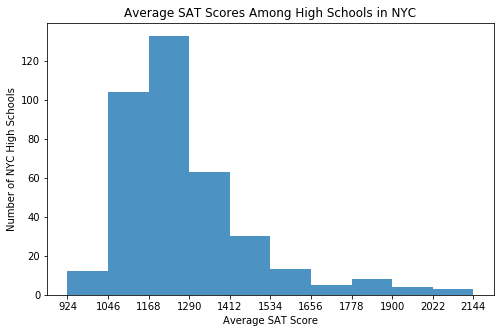

In [6]:
# view a histogram of average SAT scores 
count, bin_edges = np.histogram(df_nyc_sat['Average SAT Score'], bins = 10)
df_nyc_sat['Average SAT Score'].plot(kind = 'hist', figsize = (8, 5), alpha = 0.8, xticks = bin_edges)
plt.title('Average SAT Scores Among High Schools in NYC')
plt.xlabel('Average SAT Score')
plt.ylabel('Number of NYC High Schools')
plt.show()

#### From this preliminary analysis, it seems that most schools have average SAT scores between 1000 and 1400, while there are few schools that perform either better or worse. 

#### Let's view the mean and median average SAT scores by borough through the groupby method. The mean typically provides a good analysis of the scores, but sometimes if the data is skewed, the median can be accurate than the mean, so we will analyze both, to see if there are any discrepancies. 

In [7]:
# See the average SAT scores by borough
df_nyc_sat.groupby('Borough')['Average SAT Score'].mean()

Borough
Bronx            1202.724490
Brooklyn         1230.256881
Manhattan        1340.134831
Queens           1345.478261
Staten Island    1439.000000
Name: Average SAT Score, dtype: float64

In [8]:
# see the median average SAT score by borough
df_nyc_sat.groupby('Borough')['Average SAT Score'].median()

Borough
Bronx            1190.0
Brooklyn         1186.0
Manhattan        1284.0
Queens           1290.0
Staten Island    1382.0
Name: Average SAT Score, dtype: float64

#### Let's visualize these two using bar charts

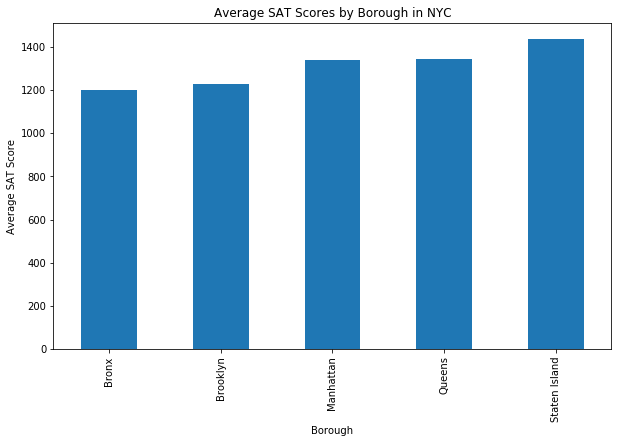

In [9]:
df_nyc_sat.groupby('Borough')['Average SAT Score'].mean().plot(kind = 'bar', figsize = (10, 6))
plt.xlabel('Borough')
plt.ylabel('Average SAT Score') 
plt.title('Average SAT Scores by Borough in NYC') 
plt.show()

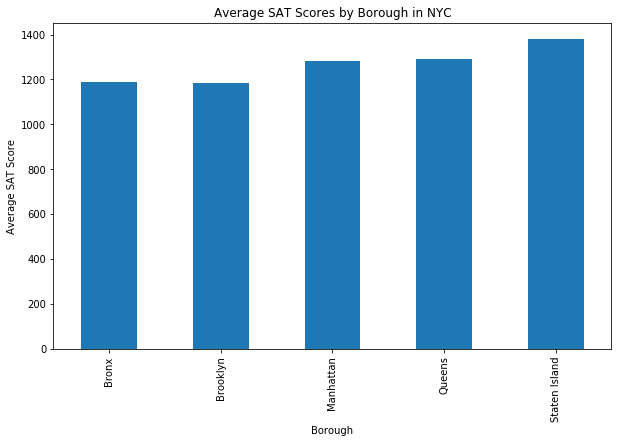

In [10]:
df_nyc_sat.groupby('Borough')['Average SAT Score'].median().plot(kind = 'bar', figsize = (10, 6))
plt.xlabel('Borough')
plt.ylabel('Average SAT Score') 
plt.title('Average SAT Scores by Borough in NYC') 
plt.show()

#### In both of these analyses, the schools with the highest average SAT scores came from Staten Island, with Queens and Manhattan following as the other boroughs with the next highest testing scores. 

#### From data found online, when the SAT was still scored on a 2400 scale, the national average used to be around 1450. Let's make a new dataframe, df_nyc_sat_above_avg, that will store all the schools in NYC that have average SAT scores above or equal to 1450.

In [11]:
# create the new dataframe
df_nyc_sat_above_avg = df_nyc_sat[df_nyc_sat['Average SAT Score'] >= 1450]

# reset the index
df_nyc_sat_above_avg = df_nyc_sat_above_avg.reset_index()
df_nyc_sat_above_avg.drop('index', axis = 1, inplace = True)
df_nyc_sat_above_avg

,School ID,School Name,Borough,Building Code,Street Address,City,State,Zip Code,Latitude,Longitude,...,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested,Average SAT Score
0,01M539,"New Explorations into Science, Technology and ...",Manhattan,M022,111 Columbia Street,Manhattan,NY,10002,40.71873,-73.97943,...,1735.0,28.6%,13.3%,18.0%,38.5%,657.0,601.0,601.0,91.0%,1859.0
1,02M545,High School for Dual Language and Asian Studies,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,416.0,1.7%,3.1%,5.5%,88.9%,613.0,453.0,463.0,95.9%,1529.0
2,01M696,Bard High School Early College,Manhattan,M097,525 East Houston Street,Manhattan,NY,10002,40.71896,-73.97607,...,545.0,45.3%,17.2%,18.7%,17.1%,634.0,641.0,639.0,70.8%,1914.0
3,02M407,Institute for Collaborative Education,Manhattan,M475,345 East 15th Street,Manhattan,NY,10003,40.73249,-73.98305,...,482.0,56.5%,14.1%,14.9%,5.8%,501.0,550.0,541.0,78.6%,1592.0
4,02M418,Millennium High School,Manhattan,M824,75 Broad Street,Manhattan,NY,10004,40.70492,-74.01151,...,659.0,32.8%,7.6%,18.2%,38.4%,577.0,560.0,567.0,94.0%,1704.0
5,02M411,Baruch College Campus High School,Manhattan,M874,55 East 25th Street,Manhattan,NY,10010,40.74405,-73.99148,...,451.0,22.8%,6.2%,14.9%,54.8%,592.0,526.0,531.0,94.3%,1649.0
6,02M413,School of the Future High School,Manhattan,M660,127 East 22nd Street,Manhattan,NY,10010,40.73895,-73.98541,...,713.0,35.9%,11.7%,30.4%,14.4%,534.0,533.0,522.0,89.9%,1589.0
7,02M439,Manhattan Village Academy,Manhattan,M873,43 West 22nd Street,Manhattan,NY,10010,40.74149,-73.99145,...,415.0,7.2%,9.6%,67.2%,7.2%,522.0,479.0,510.0,98.8%,1511.0
8,02M412,NYC Lab School for Collaborative Studies,Manhattan,M070,333 West 17th Street,Manhattan,NY,10011,40.74210,-74.00207,...,587.0,46.0%,6.0%,15.5%,27.6%,595.0,550.0,555.0,79.8%,1700.0
9,02M414,NYC Museum School,Manhattan,M070,333 West 17th Street,Manhattan,NY,10011,40.74210,-74.00207,...,471.0,12.1%,12.7%,39.7%,34.2%,560.0,530.0,522.0,90.0%,1612.0


#### Let's view where these schools are located using folium maps

In [12]:
from geopy.geocoders import Nominatim
import folium

In [13]:
# let's find the coordinates of NYC
address = 'New York City, NY'
geolocator = Nominatim(user_agent = "Exploring_NYC")
nyc_loc = geolocator.geocode(address)
nyc_lat = nyc_loc.latitude
nyc_long = nyc_loc.longitude

# view the coordinates
print('The geograpical coordinate of NYC are {}, {}.'.format(nyc_lat, nyc_long))

The geograpical coordinate of NYC are 40.7127281, -74.0060152.


In [14]:
# create map of NYC using its latitude and longitude values
nyc_map = folium.Map(location = [nyc_lat, nyc_long], zoom_start=10)

# add markers to map of NYC
for lat, lng, bor, school in zip(df_nyc_sat_above_avg['Latitude'], df_nyc_sat_above_avg['Longitude'], df_nyc_sat_above_avg['Borough'],
df_nyc_sat_above_avg['School Name']):
    label = '{}, {}'.format(bor, school)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(nyc_map)  
    
# view the map
nyc_map

#### From the map it's quite clear to see that many of the high performing schools on the SAT are located in the Manhattan/Queens boroughs. But let's make sure by using the value_counts method.

In [15]:
# view the number of high schools in this dataframe are from each borough
df_nyc_sat_above_avg['Borough'].value_counts()

Manhattan        22
Queens           16
Brooklyn          9
Bronx             4
Staten Island     2
Name: Borough, dtype: int64

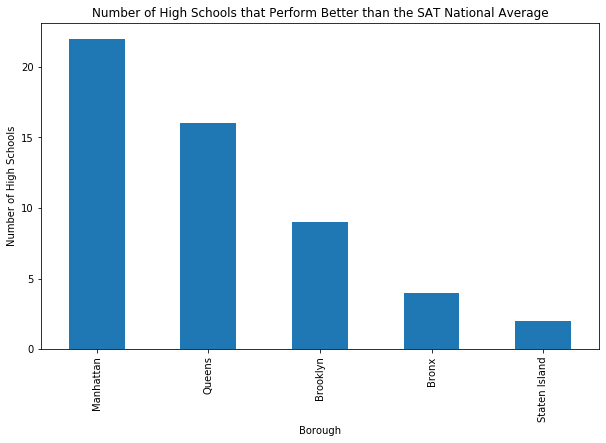

In [16]:
df_nyc_sat_above_avg['Borough'].value_counts().plot(kind = 'bar', figsize = (10, 6))
plt.xlabel('Borough')
plt.ylabel('Number of High Schools') 
plt.title('Number of High Schools that Perform Better than the SAT National Average') 
plt.show()

#### Though Staten Island seemed to have the highest average SAT score, through further analysis, we have figured out that Staten Island merely had fewer high schools, which contributed to a higher average SAT score. In fact, from this analysis, we have figured out that Manhattan seems to best place to live for families who want a good education for their children, followed by Queens. 

#### Now that we've figured which boroughs are the best for families who want a quality education for their children, let's use the Foursquare API to figure what are some of the common venues in Manhattan and Queens, the two boroughs that have the highest number of above average schools, based solely on SAT scores. By finding venues for each borough, we can then analyze and see whether certain venues are found in neighborhoods with better schools and vice versa. 

#### Let's begin by making two dataframes from df_nyc_sat_above_avg that will represent all the schools in Manhattan as well as Queens. We'll call then df_manhattan_sat & df_queens_sat respectively.

In [17]:
# create a manhattan dataframe & reindex it
df_manhattan_sat = df_nyc_sat_above_avg.loc[df_nyc_sat_above_avg['Borough'] == 'Manhattan']
df_manhattan_sat = df_manhattan_sat.reset_index()
df_manhattan_sat.drop('index', axis = 1, inplace = True)
df_manhattan_sat

,School ID,School Name,Borough,Building Code,Street Address,City,State,Zip Code,Latitude,Longitude,...,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested,Average SAT Score
0,01M539,"New Explorations into Science, Technology and ...",Manhattan,M022,111 Columbia Street,Manhattan,NY,10002,40.71873,-73.97943,...,1735.0,28.6%,13.3%,18.0%,38.5%,657.0,601.0,601.0,91.0%,1859.0
1,02M545,High School for Dual Language and Asian Studies,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,416.0,1.7%,3.1%,5.5%,88.9%,613.0,453.0,463.0,95.9%,1529.0
2,01M696,Bard High School Early College,Manhattan,M097,525 East Houston Street,Manhattan,NY,10002,40.71896,-73.97607,...,545.0,45.3%,17.2%,18.7%,17.1%,634.0,641.0,639.0,70.8%,1914.0
3,02M407,Institute for Collaborative Education,Manhattan,M475,345 East 15th Street,Manhattan,NY,10003,40.73249,-73.98305,...,482.0,56.5%,14.1%,14.9%,5.8%,501.0,550.0,541.0,78.6%,1592.0
4,02M418,Millennium High School,Manhattan,M824,75 Broad Street,Manhattan,NY,10004,40.70492,-74.01151,...,659.0,32.8%,7.6%,18.2%,38.4%,577.0,560.0,567.0,94.0%,1704.0
5,02M411,Baruch College Campus High School,Manhattan,M874,55 East 25th Street,Manhattan,NY,10010,40.74405,-73.99148,...,451.0,22.8%,6.2%,14.9%,54.8%,592.0,526.0,531.0,94.3%,1649.0
6,02M413,School of the Future High School,Manhattan,M660,127 East 22nd Street,Manhattan,NY,10010,40.73895,-73.98541,...,713.0,35.9%,11.7%,30.4%,14.4%,534.0,533.0,522.0,89.9%,1589.0
7,02M439,Manhattan Village Academy,Manhattan,M873,43 West 22nd Street,Manhattan,NY,10010,40.74149,-73.99145,...,415.0,7.2%,9.6%,67.2%,7.2%,522.0,479.0,510.0,98.8%,1511.0
8,02M412,NYC Lab School for Collaborative Studies,Manhattan,M070,333 West 17th Street,Manhattan,NY,10011,40.74210,-74.00207,...,587.0,46.0%,6.0%,15.5%,27.6%,595.0,550.0,555.0,79.8%,1700.0
9,02M414,NYC Museum School,Manhattan,M070,333 West 17th Street,Manhattan,NY,10011,40.74210,-74.00207,...,471.0,12.1%,12.7%,39.7%,34.2%,560.0,530.0,522.0,90.0%,1612.0


In [18]:
# create a queens dataframe & reindex it
df_queens_sat = df_nyc_sat_above_avg.loc[df_nyc_sat_above_avg['Borough'] == 'Queens']
df_queens_sat = df_queens_sat.reset_index()
df_queens_sat.drop('index', axis = 1, inplace = True)
df_queens_sat

,School ID,School Name,Borough,Building Code,Street Address,City,State,Zip Code,Latitude,Longitude,...,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested,Average SAT Score
0,30Q575,Academy of American Studies,Queens,Q451,28-04 41st Avenue,Long Island City,NY,11101,40.75130,-73.93742,...,874.0,28.3%,7.3%,34.3%,29.3%,495.0,482.0,479.0,84.8%,1456.0
1,24Q299,Bard High School Early College Queens,Queens,Q735,30-20 Thomson Avenue,Long Island City,NY,11101,40.74509,-73.93681,...,623.0,34.5%,11.4%,17.0%,34.2%,631.0,598.0,610.0,94.1%,1839.0
2,30Q501,Frank Sinatra School of the Arts High School,Queens,Q570,35-12 35th Avenue,Astoria,NY,11106,40.75653,-73.92514,...,808.0,38.7%,13.6%,33.4%,10.5%,536.0,543.0,543.0,89.5%,1622.0
3,30Q580,Baccalaureate School for Global Education,Queens,Q798,34-12 36th Avenue,Astoria,NY,11106,40.75517,-73.92682,...,478.0,34.5%,2.5%,21.2%,39.6%,633.0,620.0,628.0,98.5%,1881.0
4,25Q285,World Journalism Preparatory (College Board),Queens,Q025,34-65 192nd Street,Flushing,NY,11358,40.76512,-73.79006,...,610.0,50.3%,9.1%,22.7%,15.8%,484.0,491.0,487.0,89.2%,1462.0
5,26Q495,Bayside High School,Queens,Q405,32-24 Corporal Kennedy Street,Bayside,NY,11361,40.77187,-73.78039,...,3336.0,18.1%,13.0%,27.9%,40.3%,523.0,479.0,485.0,76.7%,1487.0
6,26Q415,Benjamin N. Cardozo High School,Queens,Q415,57-00 223rd Street,Oakland Gardens,NY,11364,40.75239,-73.75608,...,3505.0,14.9%,20.3%,19.4%,44.1%,563.0,505.0,510.0,75.6%,1578.0
7,26Q430,Francis Lewis High School,Queens,Q430,58-20 Utopia Parkway,Fresh Meadows,NY,11365,40.74056,-73.79285,...,4172.0,14.9%,7.4%,23.1%,53.9%,562.0,483.0,485.0,80.7%,1530.0
8,25Q252,Queens School of Inquiry,Queens,Q168,158-40 76th Road,Fresh Meadows,NY,11366,40.72452,-73.80943,...,557.0,19.2%,19.5%,21.8%,36.2%,516.0,493.0,486.0,88.2%,1495.0
9,25Q525,Townsend Harris High School,Queens,Q515,149-11 Melbourne Avenue,Flushing,NY,11367,40.73441,-73.82142,...,1132.0,21.9%,6.3%,11.6%,58.6%,680.0,640.0,661.0,97.1%,1981.0


#### Let's merge the two dataframes together and call it df_manhattan_queens_sat

In [19]:
df_manhattan_queens_sat = df_manhattan_sat
df_manhattan_queens_sat = df_manhattan_queens_sat.append(df_queens_sat, ignore_index = True)
df_manhattan_queens_sat

,School ID,School Name,Borough,Building Code,Street Address,City,State,Zip Code,Latitude,Longitude,...,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested,Average SAT Score
0,01M539,"New Explorations into Science, Technology and ...",Manhattan,M022,111 Columbia Street,Manhattan,NY,10002,40.71873,-73.97943,...,1735.0,28.6%,13.3%,18.0%,38.5%,657.0,601.0,601.0,91.0%,1859.0
1,02M545,High School for Dual Language and Asian Studies,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,416.0,1.7%,3.1%,5.5%,88.9%,613.0,453.0,463.0,95.9%,1529.0
2,01M696,Bard High School Early College,Manhattan,M097,525 East Houston Street,Manhattan,NY,10002,40.71896,-73.97607,...,545.0,45.3%,17.2%,18.7%,17.1%,634.0,641.0,639.0,70.8%,1914.0
3,02M407,Institute for Collaborative Education,Manhattan,M475,345 East 15th Street,Manhattan,NY,10003,40.73249,-73.98305,...,482.0,56.5%,14.1%,14.9%,5.8%,501.0,550.0,541.0,78.6%,1592.0
4,02M418,Millennium High School,Manhattan,M824,75 Broad Street,Manhattan,NY,10004,40.70492,-74.01151,...,659.0,32.8%,7.6%,18.2%,38.4%,577.0,560.0,567.0,94.0%,1704.0
5,02M411,Baruch College Campus High School,Manhattan,M874,55 East 25th Street,Manhattan,NY,10010,40.74405,-73.99148,...,451.0,22.8%,6.2%,14.9%,54.8%,592.0,526.0,531.0,94.3%,1649.0
6,02M413,School of the Future High School,Manhattan,M660,127 East 22nd Street,Manhattan,NY,10010,40.73895,-73.98541,...,713.0,35.9%,11.7%,30.4%,14.4%,534.0,533.0,522.0,89.9%,1589.0
7,02M439,Manhattan Village Academy,Manhattan,M873,43 West 22nd Street,Manhattan,NY,10010,40.74149,-73.99145,...,415.0,7.2%,9.6%,67.2%,7.2%,522.0,479.0,510.0,98.8%,1511.0
8,02M412,NYC Lab School for Collaborative Studies,Manhattan,M070,333 West 17th Street,Manhattan,NY,10011,40.74210,-74.00207,...,587.0,46.0%,6.0%,15.5%,27.6%,595.0,550.0,555.0,79.8%,1700.0
9,02M414,NYC Museum School,Manhattan,M070,333 West 17th Street,Manhattan,NY,10011,40.74210,-74.00207,...,471.0,12.1%,12.7%,39.7%,34.2%,560.0,530.0,522.0,90.0%,1612.0


#### Now we can begin to explore surrounding venues for each school using the Foursquare API. Let's begin by importing some necessary libraries and defining Foursquare credentials.

In [20]:
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import requests

In [58]:
# defining Foursquare credentials

CLIENT_ID = 'your foursquare id' # your Foursquare ID
CLIENT_SECRET = 'your foursquare secret' # your Foursquare Secret
VERSION = '20200619' # Foursquare API version
LIMIT = 75

print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentials:
CLIENT_ID: your foursquare id
CLIENT_SECRET:your foursquare secret


#### Now we will define a function that will enable us to get all the nearby venues to each school. We will then call the function, and store the corresponding results within the nyc_venues dataframe.

In [24]:
def getNearbyVenues(names, CLIENT_ID, CLIENT_SECRET, VERSION, latitudes, longitudes, LIMIT, radius = 500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['School Name', 
                  'School Latitude', 
                  'School Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [25]:
# create the dataframe that will store all the nearby venues
nyc_venues = getNearbyVenues(names = df_manhattan_queens_sat['School Name'],
                                 CLIENT_ID = CLIENT_ID,
                                 CLIENT_SECRET = CLIENT_SECRET,
                                 VERSION = VERSION,
                                 latitudes = df_manhattan_queens_sat['Latitude'],
                                 longitudes = df_manhattan_queens_sat['Longitude'],
                                 LIMIT = LIMIT
                                  )

New Explorations into Science, Technology and Math High School
High School for Dual Language and Asian Studies
Bard High School Early College
Institute for Collaborative Education
Millennium High School
Baruch College Campus High School
School of the Future High School
Manhattan Village Academy
NYC Lab School for Collaborative Studies
NYC Museum School
NYC iSchool
Eleanor Roosevelt High School
Beacon High School
Fiorello H. LaGuardia High School of Music and Art and Performing Arts
Manhattan / Hunter Science High School
Frank McCourt High School
Columbia Secondary School
Manhattan Center for Science and Mathematics
High School for Mathematics, Science, and Engineering at City College
Professional Performing Arts High School
Talent Unlimited High School
Stuyvesant High School
Academy of American Studies
Bard High School Early College Queens
Frank Sinatra School of the Arts High School
Baccalaureate School for Global Education
World Journalism Preparatory (College Board)
Bayside High Sch

In [44]:
nyc_venues.head()

,School Name,School Latitude,School Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"New Explorations into Science, Technology and ...",40.71873,-73.97943,Stanton Street Yoga,40.719908,-73.983115,Yoga Studio
1,"New Explorations into Science, Technology and ...",40.71873,-73.97943,Spoke Art NYC,40.718395,-73.982844,Art Gallery
2,"New Explorations into Science, Technology and ...",40.71873,-73.97943,East River Park,40.719575,-73.974787,Park
3,"New Explorations into Science, Technology and ...",40.71873,-73.97943,Casa Adela,40.722701,-73.979881,Latin American Restaurant
4,"New Explorations into Science, Technology and ...",40.71873,-73.97943,Pause Cafe,40.721264,-73.983980,Juice Bar


In [45]:
# view the amount of venues returned for each location
nyc_venues.groupby('School Name').count()

,School Latitude,School Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
School Name,,,,,,
Academy of American Studies,74,74,74,74,74,74
Baccalaureate School for Global Education,75,75,75,75,75,75
Bard High School Early College,7,7,7,7,7,7
Bard High School Early College Queens,39,39,39,39,39,39
Baruch College Campus High School,75,75,75,75,75,75
Bayside High School,2,2,2,2,2,2
Beacon High School,56,56,56,56,56,56
Benjamin N. Cardozo High School,25,25,25,25,25,25
Columbia Secondary School,75,75,75,75,75,75


#### Now we have our dataframe, nyc_venues, and we can view certain aspects of it, such as how many venues were returned for each neighborhood. Now let's begin analyzing the data. We'll begin by one-hot encoding.

In [46]:
# one hot encoding
nyc_sat_onehot = pd.get_dummies(nyc_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
nyc_sat_onehot['School Name'] = nyc_venues['School Name'] 

# move school name column to the first column
fixed_columns = [nyc_sat_onehot.columns[-1]] + list(nyc_sat_onehot.columns[:-1])
nyc_sat_onehot = nyc_sat_onehot[fixed_columns]

# group rows by neighborhood and take mean of frequency of each type of venue
nyc_sat_grouped = nyc_sat_onehot.groupby('School Name').mean().reset_index()

nyc_sat_grouped

,School Name,ATM,Afghan Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,...,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Volleyball Court,Warehouse Store,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Academy of American Studies,0.00000,0.000000,0.013514,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
1,Baccalaureate School for Global Education,0.00000,0.000000,0.026667,0.000000,0.000000,0.013333,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0000,0.000000,0.000000,0.00,0.000000,0.026667,0.000000,0.013333
2,Bard High School Early College,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
3,Bard High School Early College Queens,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025641,...,0.000000,0.000000,0.0000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
4,Baruch College Campus High School,0.00000,0.000000,0.026667,0.013333,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.040000,0.000000,0.0000,0.000000,0.000000,0.00,0.000000,0.013333,0.000000,0.053333
5,Bayside High School,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
6,Beacon High School,0.00000,0.000000,0.017857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0000,0.000000,0.000000,0.00,0.017857,0.000000,0.000000,0.000000
7,Benjamin N. Cardozo High School,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0000,0.040000,0.000000,0.00,0.000000,0.000000,0.000000,0.080000
8,Columbia Secondary School,0.00000,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000,0.013333,0.000000,...,0.000000,0.013333,0.0000,0.000000,0.000000,0.00,0.000000,0.026667,0.000000,0.000000
9,Eleanor Roosevelt High School,0.00000,0.000000,0.013333,0.000000,0.000000,0.000000,0.000000,0.013333,0.000000,...,0.000000,0.000000,0.0000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.013333


#### Let's put the top 10 venues for each school in a dataframe. 

In [47]:
# function that will return in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [48]:
num_top_venues = 10
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['School Name']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind + 1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind + 1))

# create a new dataframe
nyc_schools_venues_sorted = pd.DataFrame(columns = columns)
nyc_schools_venues_sorted['School Name'] = nyc_sat_grouped['School Name']

for ind in np.arange(nyc_sat_grouped.shape[0]):
    nyc_schools_venues_sorted.iloc[ind, 1:] = return_most_common_venues(nyc_sat_grouped.iloc[ind, :], num_top_venues)

nyc_schools_venues_sorted

,School Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Academy of American Studies,Hotel,Coffee Shop,Bar,Pizza Place,Deli / Bodega,Café,Donut Shop,Cocktail Bar,Italian Restaurant,Mexican Restaurant
1,Baccalaureate School for Global Education,Mexican Restaurant,Bar,Gym,Discount Store,Athletics & Sports,Italian Restaurant,Seafood Restaurant,Bakery,Restaurant,Café
2,Bard High School Early College,Track,Park,Tennis Court,Baseball Field,Nightclub,Yoga Studio,Electronics Store,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant
3,Bard High School Early College Queens,Café,Coffee Shop,Bakery,Halal Restaurant,Deli / Bodega,Donut Shop,Juice Bar,Tennis Court,Cafeteria,Cocktail Bar
4,Baruch College Campus High School,Coffee Shop,Hotel,Yoga Studio,Gym / Fitness Center,Vegetarian / Vegan Restaurant,Café,Hotel Bar,Japanese Restaurant,Grocery Store,American Restaurant
5,Bayside High School,Farmers Market,Gym / Fitness Center,Yoga Studio,Empanada Restaurant,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,English Restaurant
6,Beacon High School,Coffee Shop,Performing Arts Venue,Theater,Indie Movie Theater,Plaza,Concert Hall,Cycle Studio,Italian Restaurant,Grocery Store,Gym / Fitness Center
7,Benjamin N. Cardozo High School,Chinese Restaurant,Korean Restaurant,Coffee Shop,Pharmacy,Yoga Studio,Taiwanese Restaurant,Bagel Shop,Donut Shop,Bus Station,Sandwich Place
8,Columbia Secondary School,Pharmacy,Coffee Shop,Seafood Restaurant,Italian Restaurant,American Restaurant,Chinese Restaurant,Caribbean Restaurant,Pizza Place,Bank,Indian Restaurant
9,Eleanor Roosevelt High School,Italian Restaurant,Sushi Restaurant,Cocktail Bar,Café,Spanish Restaurant,Restaurant,Playground,Pizza Place,Dessert Shop,Thai Restaurant


#### Now that we have our dataframe, nyc_schools_venues_sorted, we can begin to cluster.

In [49]:
# set number of clusters
kclusters = 5

nyc_sat_grouped_clustering = nyc_sat_grouped.drop('School Name', 1)

# run k-means clustering
kmeans = KMeans(n_clusters = kclusters, random_state = 0).fit(nyc_sat_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_ 

array([1, 1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 0, 1, 1, 4])

In [50]:
# add clustering labels
nyc_schools_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

nyc_sat_merged = df_manhattan_queens_sat

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
nyc_sat_merged = nyc_sat_merged.join(nyc_schools_venues_sorted.set_index('School Name'), on = 'School Name')

nyc_sat_merged

,School ID,School Name,Borough,Building Code,Street Address,City,State,Zip Code,Latitude,Longitude,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,01M539,"New Explorations into Science, Technology and ...",Manhattan,M022,111 Columbia Street,Manhattan,NY,10002,40.71873,-73.97943,...,Park,Coffee Shop,Ramen Restaurant,Nightclub,Yoga Studio,Mediterranean Restaurant,Juice Bar,Baseball Field,French Restaurant,Latin American Restaurant
1,02M545,High School for Dual Language and Asian Studies,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,Mexican Restaurant,Bar,Ice Cream Shop,American Restaurant,Food Court,Dumpling Restaurant,Chinese Restaurant,Coffee Shop,Café,New American Restaurant
2,01M696,Bard High School Early College,Manhattan,M097,525 East Houston Street,Manhattan,NY,10002,40.71896,-73.97607,...,Track,Park,Tennis Court,Baseball Field,Nightclub,Yoga Studio,Electronics Store,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant
3,02M407,Institute for Collaborative Education,Manhattan,M475,345 East 15th Street,Manhattan,NY,10003,40.73249,-73.98305,...,Pizza Place,Wine Shop,Italian Restaurant,Bar,Bagel Shop,Japanese Restaurant,Dessert Shop,Bakery,Mexican Restaurant,Chinese Restaurant
4,02M418,Millennium High School,Manhattan,M824,75 Broad Street,Manhattan,NY,10004,40.70492,-74.01151,...,American Restaurant,Coffee Shop,Pizza Place,Mexican Restaurant,Bar,Event Space,Park,Cocktail Bar,Café,Monument / Landmark
5,02M411,Baruch College Campus High School,Manhattan,M874,55 East 25th Street,Manhattan,NY,10010,40.74405,-73.99148,...,Coffee Shop,Hotel,Yoga Studio,Gym / Fitness Center,Vegetarian / Vegan Restaurant,Café,Hotel Bar,Japanese Restaurant,Grocery Store,American Restaurant
6,02M413,School of the Future High School,Manhattan,M660,127 East 22nd Street,Manhattan,NY,10010,40.73895,-73.98541,...,New American Restaurant,Coffee Shop,Bar,Wine Shop,American Restaurant,Mediterranean Restaurant,Café,Gym,Hotel,Ice Cream Shop
7,02M439,Manhattan Village Academy,Manhattan,M873,43 West 22nd Street,Manhattan,NY,10010,40.74149,-73.99145,...,Gym / Fitness Center,Coffee Shop,Vegetarian / Vegan Restaurant,Japanese Restaurant,Cycle Studio,Café,Yoga Studio,Italian Restaurant,New American Restaurant,Spa
8,02M412,NYC Lab School for Collaborative Studies,Manhattan,M070,333 West 17th Street,Manhattan,NY,10011,40.74210,-74.00207,...,Coffee Shop,American Restaurant,New American Restaurant,Bakery,Ice Cream Shop,Café,Beer Bar,Theater,Market,Cupcake Shop
9,02M414,NYC Museum School,Manhattan,M070,333 West 17th Street,Manhattan,NY,10011,40.74210,-74.00207,...,Coffee Shop,American Restaurant,New American Restaurant,Bakery,Ice Cream Shop,Café,Beer Bar,Theater,Market,Cupcake Shop


#### We have our final dataframe. Before we can visualize it, let's proceed to clean it up one last time.

In [51]:
nyc_sat_merged = nyc_sat_merged.dropna() # drop NA values if there are any
nyc_sat_merged['Cluster Labels'] = nyc_sat_merged['Cluster Labels'].astype(int)

C:\Users\keshav\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [52]:
# create map
nyc_map_clusters = folium.Map(location = [nyc_lat, nyc_long], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, school, cluster in zip(nyc_sat_merged['Latitude'], nyc_sat_merged['Longitude'], nyc_sat_merged['School Name'], nyc_sat_merged['Cluster Labels']):
    label = folium.Popup(str(school) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(nyc_map_clusters)
       
nyc_map_clusters

#### Let's analyze each individual cluster

In [53]:
# Cluster 1
nyc_sat_merged.loc[nyc_sat_merged['Cluster Labels'] == 0, nyc_sat_merged.columns[[1] + list(range(5, nyc_sat_merged.shape[1]))]]

,School Name,City,State,Zip Code,Latitude,Longitude,Phone Number,Start Time,End Time,Student Enrollment,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
34,Thomas A. Edison Career and Technical Educatio...,Jamaica,NY,11432,40.71588,-73.79882,718-297-6580,8:00 AM,3:30 PM,2098.0,...,Donut Shop,Playground,Indian Restaurant,Fast Food Restaurant,Bus Station,Nail Salon,Empanada Restaurant,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant


In [54]:
# Cluster 2
nyc_sat_merged.loc[nyc_sat_merged['Cluster Labels'] == 1, nyc_sat_merged.columns[[1] + list(range(5, nyc_sat_merged.shape[1]))]]

,School Name,City,State,Zip Code,Latitude,Longitude,Phone Number,Start Time,End Time,Student Enrollment,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"New Explorations into Science, Technology and ...",Manhattan,NY,10002,40.71873,-73.97943,212-677-5190,8:15 AM,4:00 PM,1735.0,...,Park,Coffee Shop,Ramen Restaurant,Nightclub,Yoga Studio,Mediterranean Restaurant,Juice Bar,Baseball Field,French Restaurant,Latin American Restaurant
1,High School for Dual Language and Asian Studies,Manhattan,NY,10002,40.71687,-73.98953,212-475-4097,8:00 AM,3:35 PM,416.0,...,Mexican Restaurant,Bar,Ice Cream Shop,American Restaurant,Food Court,Dumpling Restaurant,Chinese Restaurant,Coffee Shop,Café,New American Restaurant
3,Institute for Collaborative Education,Manhattan,NY,10003,40.73249,-73.98305,212-475-7972,8:00 AM,3:00 PM,482.0,...,Pizza Place,Wine Shop,Italian Restaurant,Bar,Bagel Shop,Japanese Restaurant,Dessert Shop,Bakery,Mexican Restaurant,Chinese Restaurant
4,Millennium High School,Manhattan,NY,10004,40.70492,-74.01151,212-825-9008,8:30 AM,3:00 PM,659.0,...,American Restaurant,Coffee Shop,Pizza Place,Mexican Restaurant,Bar,Event Space,Park,Cocktail Bar,Café,Monument / Landmark
5,Baruch College Campus High School,Manhattan,NY,10010,40.74405,-73.99148,212-683-7440,8:20 AM,2:50 PM,451.0,...,Coffee Shop,Hotel,Yoga Studio,Gym / Fitness Center,Vegetarian / Vegan Restaurant,Café,Hotel Bar,Japanese Restaurant,Grocery Store,American Restaurant
6,School of the Future High School,Manhattan,NY,10010,40.73895,-73.98541,212-475-8086,8:35 AM,3:10 PM,713.0,...,New American Restaurant,Coffee Shop,Bar,Wine Shop,American Restaurant,Mediterranean Restaurant,Café,Gym,Hotel,Ice Cream Shop
7,Manhattan Village Academy,Manhattan,NY,10010,40.74149,-73.99145,212-242-8752,8:00 AM,3:20 PM,415.0,...,Gym / Fitness Center,Coffee Shop,Vegetarian / Vegan Restaurant,Japanese Restaurant,Cycle Studio,Café,Yoga Studio,Italian Restaurant,New American Restaurant,Spa
8,NYC Lab School for Collaborative Studies,Manhattan,NY,10011,40.74210,-74.00207,212-691-6119,8:00 AM,2:50 PM,587.0,...,Coffee Shop,American Restaurant,New American Restaurant,Bakery,Ice Cream Shop,Café,Beer Bar,Theater,Market,Cupcake Shop
9,NYC Museum School,Manhattan,NY,10011,40.74210,-74.00207,212-675-6206,8:15 AM,2:45 PM,471.0,...,Coffee Shop,American Restaurant,New American Restaurant,Bakery,Ice Cream Shop,Café,Beer Bar,Theater,Market,Cupcake Shop
10,NYC iSchool,Manhattan,NY,10013,40.72435,-74.00476,917-237-7300,9:00 AM,4:00 PM,442.0,...,Italian Restaurant,Clothing Store,Sushi Restaurant,French Restaurant,Café,Hotel,Coffee Shop,Bakery,Food Truck,Men's Store


In [55]:
# Cluster 3
nyc_sat_merged.loc[nyc_sat_merged['Cluster Labels'] == 2, nyc_sat_merged.columns[[1] + list(range(5, nyc_sat_merged.shape[1]))]]

,School Name,City,State,Zip Code,Latitude,Longitude,Phone Number,Start Time,End Time,Student Enrollment,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Bard High School Early College,Manhattan,NY,10002,40.71896,-73.97607,212-995-8479,9:00 AM,3:50 PM,545.0,...,Track,Park,Tennis Court,Baseball Field,Nightclub,Yoga Studio,Electronics Store,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant


In [56]:
# Cluster 4
nyc_sat_merged.loc[nyc_sat_merged['Cluster Labels'] == 3, nyc_sat_merged.columns[[1] + list(range(5, nyc_sat_merged.shape[1]))]]

,School Name,City,State,Zip Code,Latitude,Longitude,Phone Number,Start Time,End Time,Student Enrollment,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
27,Bayside High School,Bayside,NY,11361,40.77187,-73.78039,718-229-7600,8:00 AM,3:30 PM,3336.0,...,Farmers Market,Gym / Fitness Center,Yoga Studio,Empanada Restaurant,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,English Restaurant


In [57]:
# Cluster 5
nyc_sat_merged.loc[nyc_sat_merged['Cluster Labels'] == 4, nyc_sat_merged.columns[[1] + list(range(5, nyc_sat_merged.shape[1]))]]

,School Name,City,State,Zip Code,Latitude,Longitude,Phone Number,Start Time,End Time,Student Enrollment,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
30,Queens School of Inquiry,Fresh Meadows,NY,11366,40.72452,-73.80943,718-380-6929,8:38 AM,2:57 PM,557.0,...,Bus Station,Deli / Bodega,Pizza Place,Vegetarian / Vegan Restaurant,Bar,Bank,Liquor Store,Asian Restaurant,Dry Cleaner,Sandwich Place
35,York Early College Academy,Jamaica,NY,11433,40.69694,-73.78698,718-262-8547,8:00 AM,3:00 PM,611.0,...,Pizza Place,Deli / Bodega,Bus Line,Bus Station,Supermarket,Sandwich Place,Bank,Discount Store,Grocery Store,Bakery
